In [47]:
df = pd.read_excel(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\exposici칩n oral\fmi datos.xlsx")

In [50]:
import pandas as pd
filtro_country = df['Country'].isin(['United States', 'China'])
filtro_subject = df['Subject Descriptor'].isin(['Volume of imports of goods and services', 'Volume of exports of goods and services'])

In [51]:
df_filtrado = df[filtro_country & filtro_subject]


In [86]:
# Crea un nuevo DataFrame solo con las columnas seleccionadas
df_anos = df[columnas_a_mostrar]
# Filtra por pa칤s
filtro_country = df_anos['Country'].isin(['United States', 'China'])
# Filtra por descriptor
filtro_subject = df_anos['Subject Descriptor'].isin(['Volume of imports of goods and services', 'Volume of exports of goods and services'])
# Aplica ambos filtros
df_filtrado = df_anos[filtro_country & filtro_subject]

In [87]:
 df_filtrado

WEO Country Code  ISO WEO Subject Code        Country  \
1604              924  CHN          TM_RPCH          China   
1606              924  CHN          TX_RPCH          China   
8204              111  USA          TM_RPCH  United States   
8206              111  USA          TX_RPCH  United States   

                           Subject Descriptor   2010   2011  2012   2013  \
1604  Volume of imports of goods and services  23094  13422  6591  10647   
1606  Volume of exports of goods and services  28461  10964  5882   8760   
8204  Volume of imports of goods and services  12968   4816  2449   1212   
8206  Volume of exports of goods and services  12647   7178  4019   3010   

      2014  ...    2020   2021    2022   2023  2024  2025   2026  2027  2028  \
1604  7774  ...   -6684  10451   -2103   6183  6959  4379   3900  3700  3600   
1606  4295  ...   -3150  18517  -0.241   1806  8437  3656   3000  3000  3000   
8204  5160  ...   -8979  14671    8593  -1172  4705  1790  0.882  1305  1346   
8206  3902  ...  -13127   6477    7513   2764  2729  2498   2885  2924  2942   

      2029  
1604  3500  
1606  3000  
8204  1212  
8206  2859  

[4 rows x 25 columns]

In [15]:
df_filtrado.to_excel(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\exposici칩n oral\df_filtrado.xlsx", index=False)

In [39]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [53]:
# Cargar los datos
df = pd.read_excel(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\exposici칩n oral\df_filtrado.xlsx")  # Aseg칰rate de usar tu archivo de datos

C:\Users\El economista\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


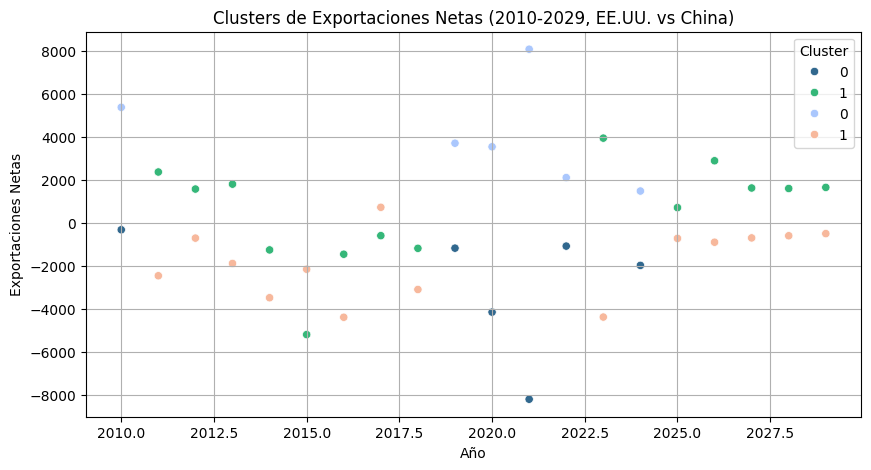

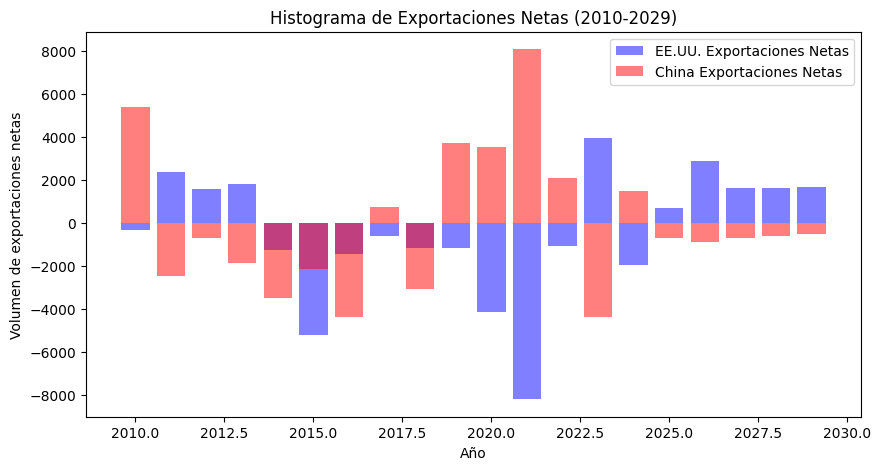

In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans

# **Evitar errores de memoria en Windows**
os.environ["OMP_NUM_THREADS"] = "1"

# Filtrar datos de EE.UU. y China
df_eeuu = df[(df['Country'] == 'United States') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]
df_china = df[(df['Country'] == 'China') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]

# **Obtener la lista de a침os excluyendo "Cluster" si existe**
years = [col for col in df_eeuu.columns[5:] if col not in ["Cluster"]]
years = list(map(int, years))  # Convertir nombres de columnas a enteros (a침os)

# **Calcular Exportaciones Netas asegurando mismo tama침o de arrays**
net_export_eeuu = df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()
net_export_china = df_china[df_china['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_china[df_china['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()

# **Asegurar que las listas tienen la misma longitud**
min_length = min(len(years), len(net_export_eeuu), len(net_export_china))
years = years[:min_length]
net_export_eeuu = net_export_eeuu[:min_length]
net_export_china = net_export_china[:min_length]

# **Convertir en DataFrame**
df_net_exports = pd.DataFrame({'Year': years, 'EE.UU. Net Export': net_export_eeuu, 'China Net Export': net_export_china})

# **Aplicar MiniBatchKMeans sobre exportaciones netas**
X = df_net_exports.iloc[:, 1:].values  # Usamos exportaciones netas de ambos pa칤ses
kmeans = MiniBatchKMeans(n_clusters=2, batch_size=3072, random_state=42)
df_net_exports["Cluster"] = kmeans.fit_predict(X)

# **Visualizaci칩n de Clusters con a침os en eje X**
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["EE.UU. Net Export"], hue=df_net_exports["Cluster"], palette="viridis")
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["China Net Export"], hue=df_net_exports["Cluster"], palette="coolwarm")

plt.title("Clusters de Exportaciones Netas (2010-2029, EE.UU. vs China)")
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# **Histograma con a침os en el eje X**
plt.figure(figsize=(10,5))
plt.bar(df_net_exports["Year"], df_net_exports["EE.UU. Net Export"], alpha=0.5, label="EE.UU. Exportaciones Netas", color="blue")
plt.bar(df_net_exports["Year"], df_net_exports["China Net Export"], alpha=0.5, label="China Exportaciones Netas", color="red")

plt.title("Histograma de Exportaciones Netas (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Volumen de exportaciones netas")
plt.legend()
plt.show()

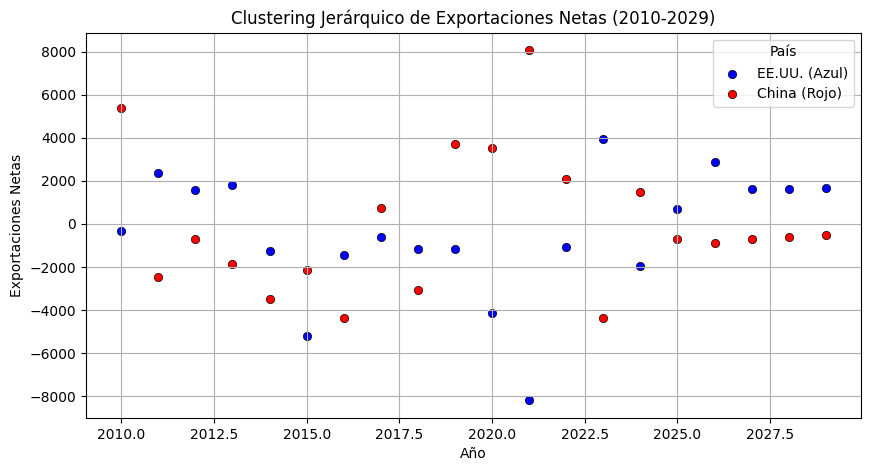

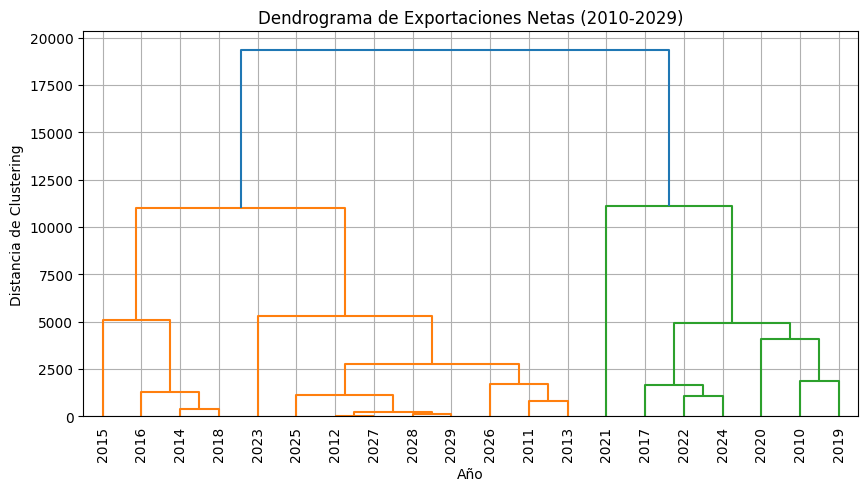

In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# **Evitar errores de memoria en Windows**
os.environ["OMP_NUM_THREADS"] = "1"

# Filtrar datos de EE.UU. y China
df_eeuu = df[(df['Country'] == 'United States') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]
df_china = df[(df['Country'] == 'China') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]

# **Obtener la lista de a침os excluyendo "Cluster" si existe**
years = [col for col in df_eeuu.columns[5:] if col not in ["Cluster"]]
years = list(map(int, years))  # Convertir nombres de columnas a enteros (a침os)

# **Calcular Exportaciones Netas asegurando mismo tama침o de arrays**
net_export_eeuu = df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()
net_export_china = df_china[df_china['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_china[df_china['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()

# **Asegurar que las listas tienen la misma longitud**
min_length = min(len(years), len(net_export_eeuu), len(net_export_china))
years = years[:min_length]
net_export_eeuu = net_export_eeuu[:min_length]
net_export_china = net_export_china[:min_length]

# **Convertir en DataFrame**
df_net_exports = pd.DataFrame({'Year': years, 'EE.UU. Net Export': net_export_eeuu, 'China Net Export': net_export_china})

# **Aplicar Clustering Jer치rquico**
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="ward")
df_net_exports["Cluster"] = clustering.fit_predict(df_net_exports.iloc[:, 1:].values)

# **Visualizaci칩n de Clusters con colores separados**
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["EE.UU. Net Export"], color="blue", edgecolor="black", label="EE.UU.")
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["China Net Export"], color="red", edgecolor="black", label="China")

plt.title("Clustering Jer치rquico de Exportaciones Netas (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.legend(["EE.UU. (Azul)", "China (Rojo)"], title="Pa칤s")
plt.grid(True)
plt.show()

# **Generar Dendrograma con colores diferenciados**
plt.figure(figsize=(10, 5))
linked = linkage(df_net_exports.iloc[:, 1:].values, method="ward")
dendrogram(linked, labels=df_net_exports["Year"].values, leaf_rotation=90, leaf_font_size=10)

plt.title("Dendrograma de Exportaciones Netas (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Distancia de Clustering")
plt.grid(True)
plt.show()

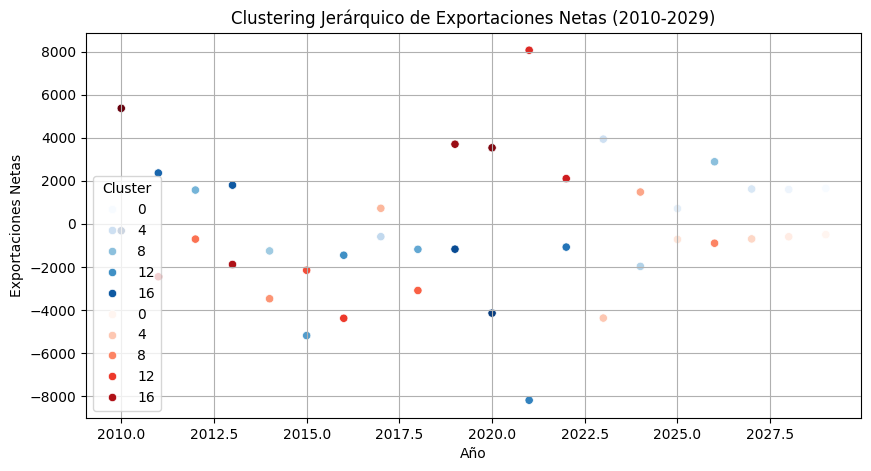

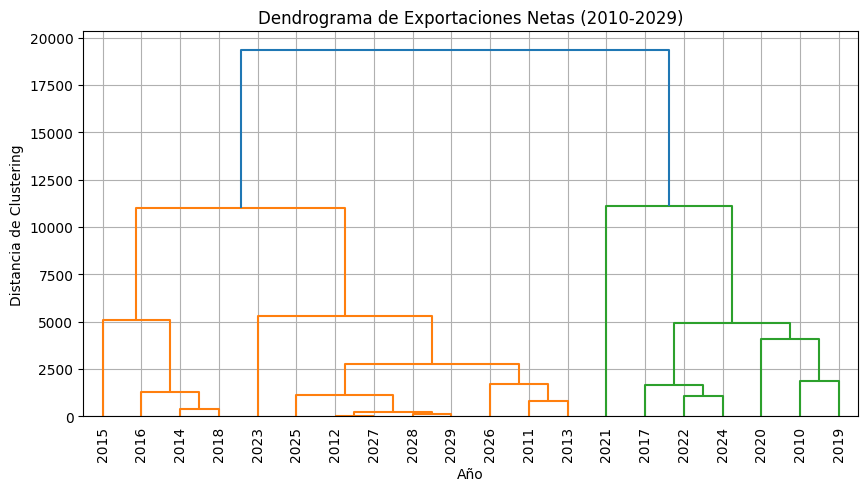

In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# **Evitar errores de memoria en Windows**
os.environ["OMP_NUM_THREADS"] = "1"

# Filtrar datos de EE.UU. y China
df_eeuu = df[(df['Country'] == 'United States') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]
df_china = df[(df['Country'] == 'China') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]

# **Obtener la lista de a침os excluyendo "Cluster" si existe**
years = [col for col in df_eeuu.columns[5:] if col not in ["Cluster"]]
years = list(map(int, years))  # Convertir nombres de columnas a enteros (a침os)

# **Calcular Exportaciones Netas asegurando mismo tama침o de arrays**
net_export_eeuu = df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()
net_export_china = df_china[df_china['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_china[df_china['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()

# **Asegurar que las listas tienen la misma longitud**
min_length = min(len(years), len(net_export_eeuu), len(net_export_china))
years = years[:min_length]
net_export_eeuu = net_export_eeuu[:min_length]
net_export_china = net_export_china[:min_length]

# **Convertir en DataFrame**
df_net_exports = pd.DataFrame({'Year': years, 'EE.UU. Net Export': net_export_eeuu, 'China Net Export': net_export_china})

# **Aplicar Clustering Jer치rquico**
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="ward")
df_net_exports["Cluster"] = clustering.fit_predict(df_net_exports.iloc[:, 1:].values)

# **Visualizaci칩n de Clusters con colores separados para EE.UU. y China**
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["EE.UU. Net Export"], hue=df_net_exports["Cluster"], palette="Blues")
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["China Net Export"], hue=df_net_exports["Cluster"], palette="Reds")

plt.title("Clustering Jer치rquico de Exportaciones Netas (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# **Generar Dendrograma con colores diferenciados**
plt.figure(figsize=(10, 5))
linked = linkage(df_net_exports.iloc[:, 1:].values, method="ward")
dendrogram(linked, labels=df_net_exports["Year"].values, leaf_rotation=90, leaf_font_size=10)

plt.title("Dendrograma de Exportaciones Netas (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Distancia de Clustering")
plt.grid(True)
plt.show()

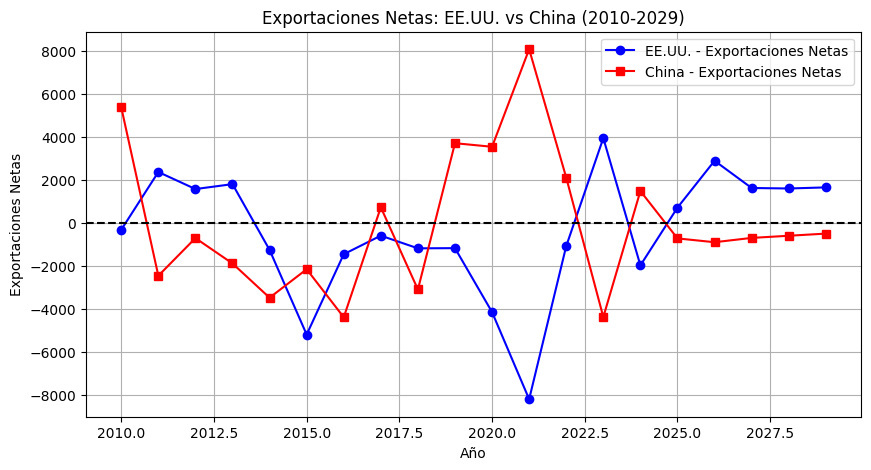

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar datos de EE.UU. y China
df_eeuu = df[(df['Country'] == 'United States') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]
df_china = df[(df['Country'] == 'China') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]

# Calcular Exportaciones Netas (Exportaciones - Importaciones)
net_export_eeuu = df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:-1].values.flatten() - df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:-1].values.flatten()
net_export_china = df_china[df_china['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:-1].values.flatten() - df_china[df_china['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:-1].values.flatten()

# Obtener la lista de a침os (excluyendo "Cluster")
years = [col for col in df_eeuu.columns[5:] if col != "Cluster"]

# Crear gr치fico de l칤neas
plt.figure(figsize=(10, 5))
plt.plot(years, net_export_eeuu, label="EE.UU. - Exportaciones Netas", linestyle="-", color="blue", marker="o")
plt.plot(years, net_export_china, label="China - Exportaciones Netas", linestyle="-", color="red", marker="s")

plt.axhline(y=0, color='black', linestyle='dashed')  # L칤nea de referencia en cero
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.title("Exportaciones Netas: EE.UU. vs China (2010-2029)")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
import pandas as pd
# Filtrar datos de EE.UU. y China
df_eeuu = df[(df['Country'] == 'United States') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]
df_china = df[(df['Country'] == 'China') & (df['Subject Descriptor'].isin(['Volume of exports of goods and services', 'Volume of imports of goods and services']))]

# **Calcular Exportaciones Netas**
exportaciones_netas_eeuu = df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_eeuu[df_eeuu['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()
exportaciones_netas_china = df_china[df_china['Subject Descriptor'] == 'Volume of exports of goods and services'].iloc[:, 5:].values.flatten() - df_china[df_china['Subject Descriptor'] == 'Volume of imports of goods and services'].iloc[:, 5:].values.flatten()

# **Convertir en DataFrame**
df_estadisticas = pd.DataFrame({'A침o': df_eeuu.columns[5:], 'Exportaciones Netas EE.UU.': exportaciones_netas_eeuu, 'Exportaciones Netas China': exportaciones_netas_china})

# **Generar estad칤sticas descriptivas**
estadisticas_eeuu = df_estadisticas["Exportaciones Netas EE.UU."].describe().rename(index={
    "count": "Cantidad de registros",
    "mean": "Promedio",
    "std": "Desviaci칩n est치ndar",
    "min": "M칤nimo",
    "25%": "Percentil 25%",
    "50%": "Mediana",
    "75%": "Percentil 75%",
    "max": "M치ximo"
})

estadisticas_china = df_estadisticas["Exportaciones Netas China"].describe().rename(index={
    "count": "Cantidad de registros",
    "mean": "Promedio",
    "std": "Desviaci칩n est치ndar",
    "min": "M칤nimo",
    "25%": "Percentil 25%",
    "50%": "Mediana",
    "75%": "Percentil 75%",
    "max": "M치ximo"
})

# **Calcular curtosis y asimetr칤a y agregar a la tabla**
estadisticas_eeuu["Asimetr칤a"] = df_estadisticas["Exportaciones Netas EE.UU."].skew()
estadisticas_eeuu["Curtosis"] = df_estadisticas["Exportaciones Netas EE.UU."].kurtosis()

estadisticas_china["Asimetr칤a"] = df_estadisticas["Exportaciones Netas China"].skew()
estadisticas_china["Curtosis"] = df_estadisticas["Exportaciones Netas China"].kurtosis()

# **Mostrar resultados en espa침ol**
print("游늵 Estad칤stica Descriptiva - Estados Unidos")
print(estadisticas_eeuu)
print("\n游늵 Estad칤stica Descriptiva - China")
print(estadisticas_china)

游늵 Estad칤stica Descriptiva - Estados Unidos
Cantidad de registros      21.000000
Promedio                 -402.835952
Desviaci칩n est치ndar      2858.064759
M칤nimo                  -8194.000000
Percentil 25%           -1258.000000
Mediana                  -321.000000
Percentil 75%            1619.000000
M치ximo                   3936.000000
Asimetr칤a                  -1.086992
Curtosis                    1.588902
Name: Exportaciones Netas EE.UU., dtype: float64

游늵 Estad칤stica Descriptiva - China
Cantidad de registros      21.000000
Promedio                  -47.672571
Desviaci칩n est치ndar      3196.833016
M칤nimo                  -4386.321000
Percentil 25%           -2155.562000
Mediana                  -700.000000
Percentil 75%            1478.000000
M치ximo                   8066.000000
Asimetr칤a                   0.917705
Curtosis                    0.746014
Name: Exportaciones Netas China, dtype: float64


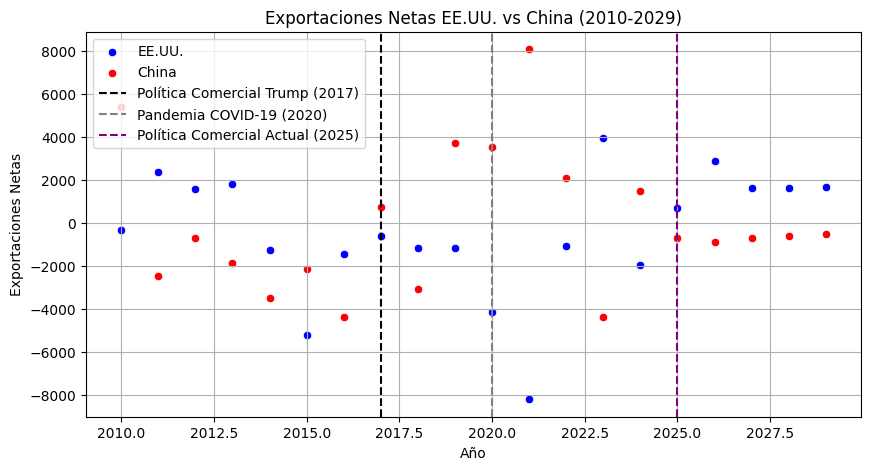

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el gr치fico
plt.figure(figsize=(10, 5))

# Graficar exportaciones netas de EE.UU. y China
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["EE.UU. Net Export"], color="blue", label="EE.UU.")
sns.scatterplot(x=df_net_exports["Year"], y=df_net_exports["China Net Export"], color="red", label="China")

# **Marcar eventos clave**
plt.axvline(x=2017, color="black", linestyle="--", label="Pol칤tica Comercial Trump (2017)")
plt.axvline(x=2020, color="gray", linestyle="--", label="Pandemia COVID-19 (2020)")
plt.axvline(x=2025, color="purple", linestyle="--", label="Pol칤tica Comercial Actual (2025)")

# Personalizaci칩n del gr치fico
plt.title("Exportaciones Netas EE.UU. vs China (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.legend()
plt.grid(True)

# Mostrar gr치fico
plt.show()

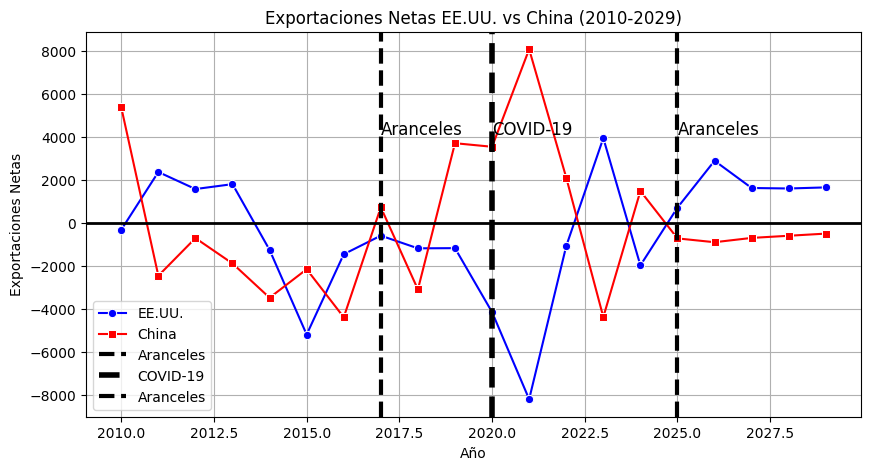

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el gr치fico
plt.figure(figsize=(10, 5))

# Graficar exportaciones netas de EE.UU. y China con puntos en los bordes
sns.lineplot(x=df_net_exports["Year"], y=df_net_exports["EE.UU. Net Export"], color="blue", label="EE.UU.", marker="o")
sns.lineplot(x=df_net_exports["Year"], y=df_net_exports["China Net Export"], color="red", label="China", marker="s")

# **Agregar l칤nea horizontal en el eje 0**
plt.axhline(y=0, color="black", linestyle="-", linewidth=2)

# **Marcar eventos clave con l칤neas verticales m치s visibles**
plt.axvline(x=2017, color="black", linestyle="--", linewidth=3, label="Aranceles")
plt.axvline(x=2020, color="black", linestyle="--", linewidth=4, label="COVID-19")
plt.axvline(x=2025, color="black", linestyle="--", linewidth=3, label="Aranceles")

# **Agregar etiquetas para cada l칤nea vertical**
plt.text(2017, df_net_exports["EE.UU. Net Export"].max(), "Aranceles", fontsize=12, color="black", verticalalignment='bottom')
plt.text(2020, df_net_exports["EE.UU. Net Export"].max(), "COVID-19", fontsize=12, color="black", verticalalignment='bottom')
plt.text(2025, df_net_exports["EE.UU. Net Export"].max(), "Aranceles", fontsize=12, color="black", verticalalignment='bottom')

# Personalizaci칩n del gr치fico
plt.title("Exportaciones Netas EE.UU. vs China (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.legend()
plt.grid(True)

# Mostrar gr치fico
plt.show()

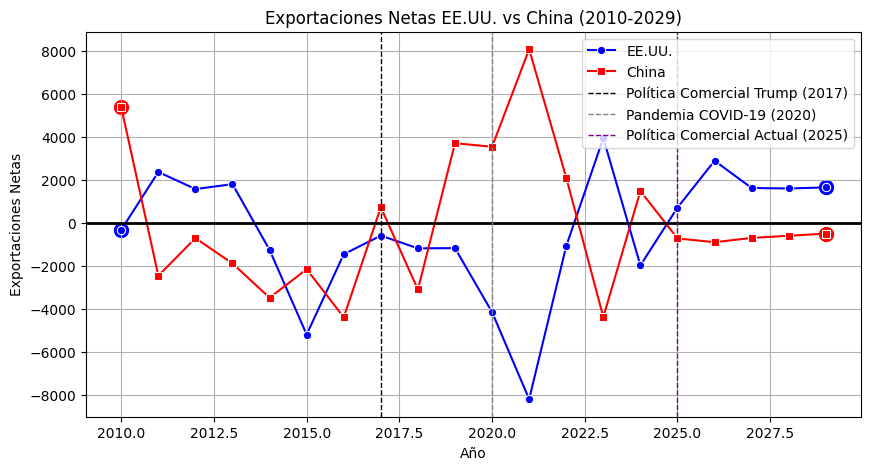

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el gr치fico
plt.figure(figsize=(10, 5))

# Graficar exportaciones netas de EE.UU. y China con puntos en los bordes
sns.lineplot(x=df_net_exports["Year"], y=df_net_exports["EE.UU. Net Export"], color="blue", label="EE.UU.", marker="o")
sns.lineplot(x=df_net_exports["Year"], y=df_net_exports["China Net Export"], color="red", label="China", marker="s")

# **Agregar l칤nea horizontal destacada en el eje 0**
plt.axhline(y=0, color="black", linestyle="-", linewidth=2)

# **Marcar eventos clave con l칤neas verticales**
plt.axvline(x=2017, color="black", linestyle="--", linewidth=1, label="Pol칤tica Comercial Trump (2017)")
plt.axvline(x=2020, color="gray", linestyle="--", linewidth=1, label="Pandemia COVID-19 (2020)")
plt.axvline(x=2025, color="purple", linestyle="--", linewidth=1, label="Pol칤tica Comercial Actual (2025)")

# **Agregar puntos en los extremos de las l칤neas**
plt.scatter(df_net_exports["Year"].iloc[0], df_net_exports["EE.UU. Net Export"].iloc[0], color="blue", s=100)
plt.scatter(df_net_exports["Year"].iloc[-1], df_net_exports["EE.UU. Net Export"].iloc[-1], color="blue", s=100)
plt.scatter(df_net_exports["Year"].iloc[0], df_net_exports["China Net Export"].iloc[0], color="red", s=100)
plt.scatter(df_net_exports["Year"].iloc[-1], df_net_exports["China Net Export"].iloc[-1], color="red", s=100)

# Personalizaci칩n del gr치fico
plt.title("Exportaciones Netas EE.UU. vs China (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.legend()
plt.grid(True)

# Mostrar gr치fico
plt.show()

C:\Users\El economista\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


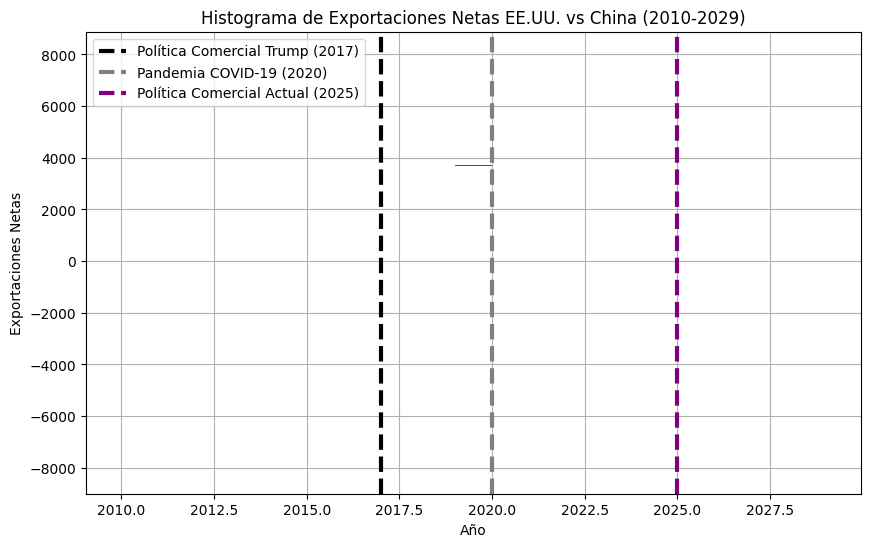

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tama침o del gr치fico
plt.figure(figsize=(10, 6))

# Crear el histograma de exportaciones netas
ax = sns.histplot(data=df_net_exports, x="Year", y="EE.UU. Net Export", color="blue", label="EE.UU.", binwidth=1)
sns.histplot(data=df_net_exports, x="Year", y="China Net Export", color="red", label="China", binwidth=1)

# **Agregar l칤neas verticales en los a침os clave**
plt.axvline(x=2017, color="black", linestyle="--", linewidth=3)
plt.axvline(x=2020, color="gray", linestyle="--", linewidth=3)
plt.axvline(x=2025, color="purple", linestyle="--", linewidth=3)

# **Crear handles manuales para la leyenda**
legend_handles = [
    plt.Line2D([0], [0], color="black", linestyle="--", linewidth=3, label="Pol칤tica Comercial Trump (2017)"),
    plt.Line2D([0], [0], color="gray", linestyle="--", linewidth=3, label="Pandemia COVID-19 (2020)"),
    plt.Line2D([0], [0], color="purple", linestyle="--", linewidth=3, label="Pol칤tica Comercial Actual (2025)")
]

# Agregar leyenda manualmente
plt.legend(handles=legend_handles)

# Personalizaci칩n del gr치fico
plt.title("Histograma de Exportaciones Netas EE.UU. vs China (2010-2029)")
plt.xlabel("A침o")
plt.ylabel("Exportaciones Netas")
plt.grid(True)

# Mostrar gr치fico
plt.show()